# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math
import seaborn as sns

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [2]:
# read the dataset
data = pd.read_csv('./data/police_incidents.csv')

# define the 10 focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# filter the data to only include the focus crimes
data_focus = data[data['Incident Category'].isin(focuscrimes)]


Important preprocessing steps made to the file containing the full dataset: 
- Not relevat columns were deleted and columns with different names in the two given datasets where renamed to the same name. 
- Date-type columns where processed to have the same format in both datasets
- Data in columns 'Incident Category', 'Incident Description' and 'Police District' was converted to upper case for all instances. 
- Rows with missing values were dropped. 
- Categories that were named with synonyms were grouped under the title of the pertinent focus crime. 


Year with most crimes:  2018

Year with least crimes:  2025 



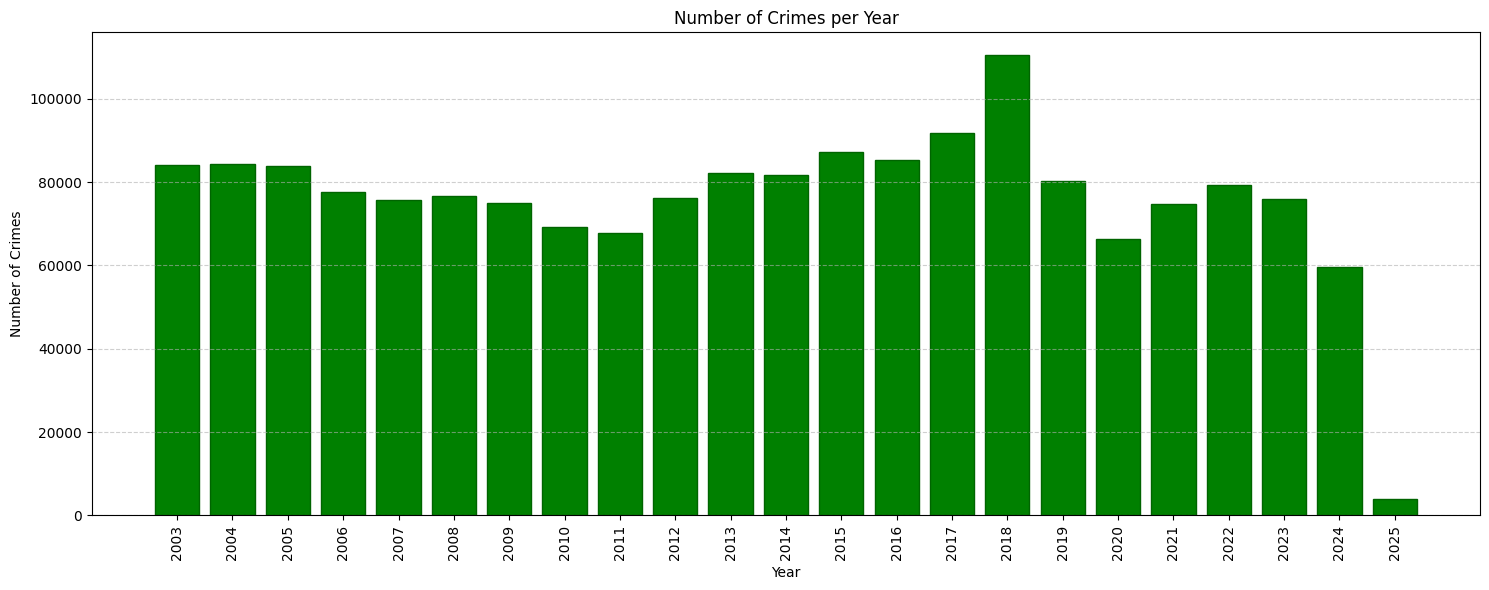

In [34]:
# Number of crimes per year

# count number of crimes per year
crimes_per_year = data_focus['Incident Year'].value_counts().sort_index()

# year with most crimes
year_with_most_crimes = crimes_per_year.idxmax()
print('\nYear with most crimes: ', year_with_most_crimes)

# year with least crimes
year_with_least_crimes = crimes_per_year.idxmin()
print('\nYear with least crimes: ', year_with_least_crimes, '\n')

# bar plot of the number of crimes per year
plt.figure(figsize=(15, 6))
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.bar(crimes_per_year.index, crimes_per_year.values, color = 'green', edgecolor='darkgreen')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(crimes_per_year.index, rotation=90)  # Rotate the x-axis labels vertically
plt.tight_layout()
plt.show()


**What is the year with most focus crimes?**

The year with most focus crimes is 2018, with more than 100.000 crimes. 

**What is the year with the fewest focus crimes?**

The year with the fewest focus crimes, without taking into account 2025, as it does not contain information of the whole year, is 2024, with a little bit less than 60.000 crimes, suprisingly below 2020. 

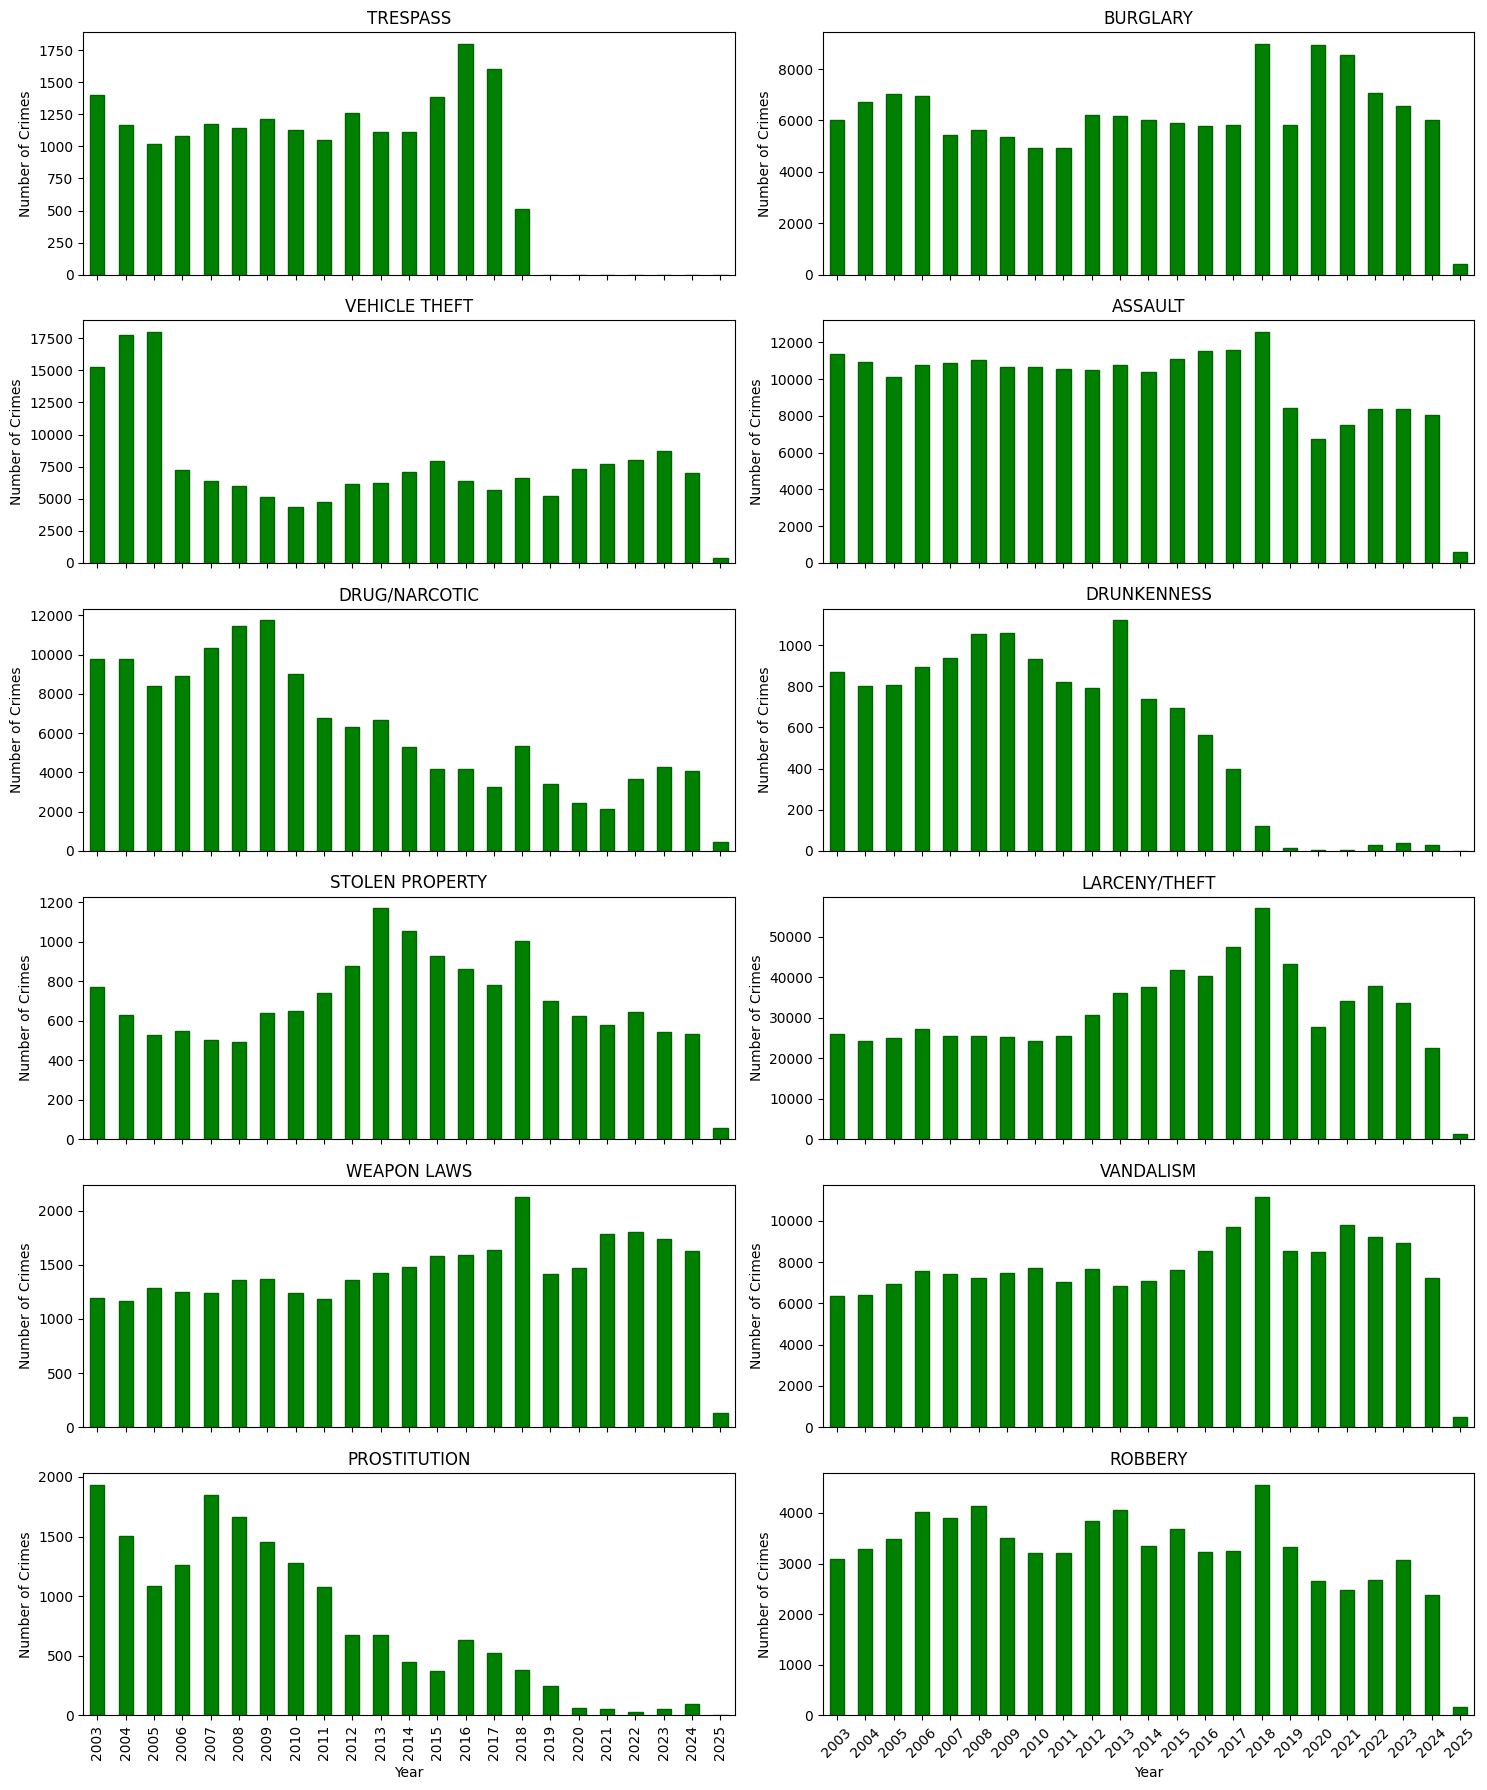

In [33]:
# Create bar-charts displaying the year-by-year development of each of these categories.

# Group data by category and year
category_year_counts = data_focus.groupby('Incident Category')['Incident Year'].value_counts().unstack()

# Define the number of rows and columns of the subplots
num_cols = 2
num_categories = len(focuscrimes)
num_rows = math.ceil(num_categories / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows), sharex=True)
axes = axes.flatten()

for i, category in enumerate(focuscrimes):
    category_year_counts.loc[category].plot(kind='bar', ax=axes[i], color = 'green', edgecolor='darkgreen')
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comment on at least three interesting trends in your plot:**

Several observations can be made from the plots. 
- First, there is a noticeable decrease in crimes related to drugs and narcotics, as well as prostitution, over the years. Drug-related crimes peaked in 2009 and have been declining since then. Prostitution-related crimes peaked in 2007 and have also been decreasing. While prostitution crimes appear to be nearly disappearing, drug-related crimes, although reduced, still occur relatively frequently.
- Second, vehicle theft crimes experienced a significant increase between 2003 and 2005. After this period, the number of vehicle thefts decreased but has remained relatively stable since 2006, indicating that vehicle theft is still a persistent issue.
- Crimes such as assault, weapon law violations, and robbery have remained relatively constant over the years. This consistency suggests that these types of crimes are ongoing issues that require continuous monitoring and intervention.
- Finally, crimes related to drunkenness and trespassing appear to be underreported or not monitored from 2019 onwards, as there is very little or no data collected for these crimes in the most recent period. This lack of data could indicate changes in reporting practices or enforcement priorities.

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")

    * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
    
    If we specify the definitions for the GPS example, data would be the actual recorded activities, like the distance or heart rate, while the metadata would be the information about this data, such as the data collection method or the GPS accuracy.  

    * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

    Yes, we agree that the human eye is a great tool for data analysis, however, it is not good in all the tasks. We would say that the eye is good at recognizing patterns and detecting outliers, these are two well-known facts, as we, for example, are very good at recognizing familiar faces, even though they change a little bit (they get a haircut or wear glasses). However, we also know that it has some limitations. For example, it can have trouble tracking fast-moving objects, because we have a limited number of frames per second that we can process. 


    * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
    
    Another example that could explain Simpson’s paradox could be the comparison of the effectiveness of two new drugs. Imagine you have two drugs in a clinical trial phase, and you test these two drugs in different groups of different sizes. In each individual group, drug 1, for example, could be better than drug 2. However, what is important to know is the overall success rate of the drug. In this case, if drug 2 has a larger number of participants in the groups where its success rate is higher, and drug 1 has smaller groups where its effectiveness is higher, the final result would show that drug 2 is more effective overall, even though it is outperformed by drug 1 in every individual group.

    * In your own words, explain the difference between *exploratory* and *explanatory* data analysis.

    Exploratory data analysis is when you investigate a dataset to understand its main characteristics, detect patterns or identify relationships. Its goal is to explore the data and discover insights. On the other hand, explanatory data analysis is when we already have insights of the data and we want to communicate them.



* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.
    1. When displaying multiple plots, use subplots. 
    2. Optimize spacing with plt.tight_layout()
    3. Always add labels!
    4. Choose meaningful axis values, they don't necessarly need to be the default ones. 
    5. Ensure legends and annotations don't overlap with the data. 
    6. Adjust the values of the y-axis to a correct scale, taking into account the data context.
    7. In subplots, axes should be comparable, so y-axis scales and limits should be consistent across plots. 
    8. Keep plots simple, include only the essential components and data.
    9. Change the default font and maintain a consistent font style across all plots you do for a particular project. 
    10. Add meaningful captions: include a headline for context and a brief explanation for each figure.

## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


### Exercise Part 1

> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

For this exercise, we will create a jitter-plot for the prostitution data in 2003. As we have seen in previous exercices, this is the year when most crimes of this category occured. More precisely, we will focus in the crimes that ocurred around 23 during the last 6 months of the year.

First, we will proceed with the filtering of the data.

In [10]:
#keep only those whose category is prostitution and year is 2003
prostitution_data = data_focus[data_focus['Incident Category'] == 'PROSTITUTION']
prostitution_data = prostitution_data[prostitution_data['Incident Year'] == 2003]
prostitution_data.head()

#keep only data for the last 6 months
prostitution_data = prostitution_data[prostitution_data['Incident Month'] >= 7]

#keep only data for the hours between 23 and 24
prostitution_data = prostitution_data[(prostitution_data['Incident Hour'] == 23)]


# Add vertical jitter (random noise on y-axis)
np.random.seed(42)  # For reproducibility
prostitution_data['Jitter'] = np.random.uniform(-0.1, 0.1, size=len(prostitution_data))

prostitution_data.head()

,Incident Number,Incident Code,Incident Category,Incident Description,Incident Day of Week,Incident Date,Incident Time,Police District,Resolution,Address,...,Point,Neighborhoods,Current Police Districts,Current Supervisor Districts,Incident Month,Incident Month Name,Incident Year,Incident Hour,Incident Minute,Jitter
14787,30815437,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Tuesday,2003-07-08,23:09,MISSION,"ARREST, BOOKED",SOUTH VAN NESS AV / 17TH ST,...,POINT (-122.41733258259801 37.7635718955939),53.0,3.0,2.0,7,July,2003,23,9,-0.025092
28492,31139290,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Friday,2003-09-26,23:20,MISSION,"ARREST, BOOKED",FOLSOM ST / 18TH ST,...,POINT (-122.41500053679398 37.7620990020727),53.0,3.0,2.0,9,September,2003,23,20,0.090143
42879,31431949,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Monday,2003-12-08,23:15,NORTHERN,"ARREST, BOOKED",STEINER ST / WILMOT ST,...,POINT (-122.435202377987 37.7872742465549),103.0,4.0,11.0,12,December,2003,23,15,0.046399
91648,90253758,13020,PROSTITUTION,PANDERING,Thursday,2003-11-13,23:55,BAYVIEW,NONE,200 Block of CHINABASIN ST,...,POINT (-122.387789980293 37.7757113649966),34.0,1.0,10.0,11,November,2003,23,55,0.019732
165723,31155042,13070,PROSTITUTION,SOLICITS TO VISIT HOUSE OF PROSTITUTION,Sunday,2003-09-28,23:59,NORTHERN,"ARREST, BOOKED",LARKIN ST / POST ST,...,POINT (-122.418274171667 37.7870372043456),50.0,6.0,10.0,9,September,2003,23,59,-0.068796


Once we have only the data that we want to analyze, we can proceed to the creation of the plot.

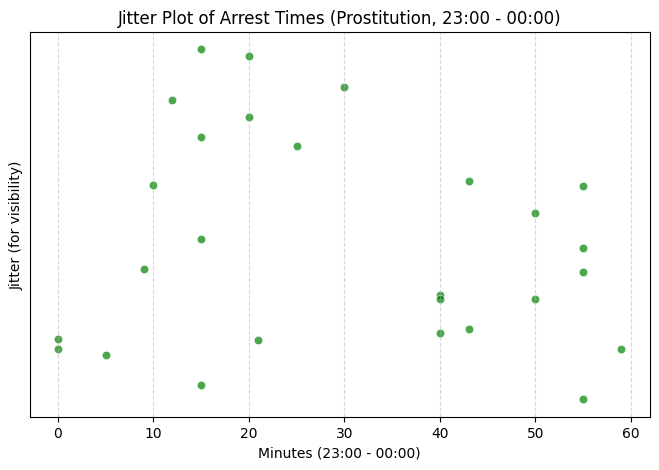

In [27]:
# Plot the jitter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=prostitution_data['Incident Minute'], y=prostitution_data['Jitter'], alpha=0.7, color='green')

# Labels and styling
plt.xlabel("Minutes (23:00 - 00:00)")
plt.ylabel("Jitter (for visibility)")
plt.title("Jitter Plot of Arrest Times (Prostitution, 23:00 - 00:00)")
plt.yticks([])  # Hide y-axis labels since it's just jitter
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

This jitter plot allows us to see the arrest times for prostitution crimes from 23:00 to 00:00, where the x-axis represent the minutes within the hour. As it can be seen, it doesn't seem to be a clear pattern on the distribution of the arrests withing the hour. However, it seem that the arrests tend to happen around round-minute marks, for example, 10, 15 or 20 minutes, which leads us to think that te officers don't really note down the exact time of the arrest.

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
    >   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    >   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

For this part of the exercise, we decided to work with assault and drug/narcotic crimes. After trying different time intervals, we decided to use the data for 2024.

In [25]:
two_crime_data = data_focus[(data_focus['Incident Category'] == 'ASSAULT') | (data_focus['Incident Category'] == 'DRUG/NARCOTIC')]
two_crime_data = two_crime_data[two_crime_data['Incident Year'] >= 2024]
len(two_crime_data)

13142

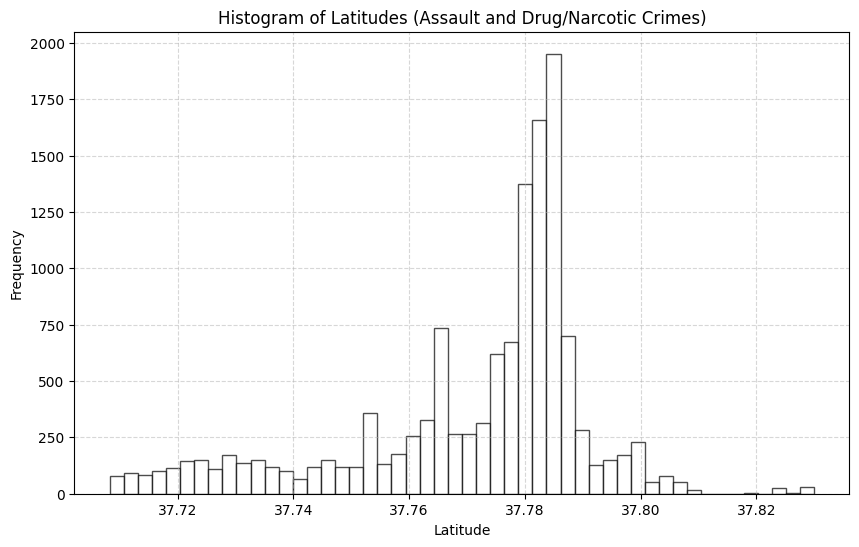

In [26]:
#take the latitude of the data and binn the latitudes using numpy's histogram function
latitudes = two_crime_data['Latitude']
latitudes = latitudes.dropna()

# Binning the latitudes
lat_bins = np.histogram(latitudes, bins=50)[1]  # Get the bin edges

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(latitudes, bins=lat_bins, color='white', edgecolor='black', alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Histogram of Latitudes (Assault and Drug/Narcotic Crimes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

The histogram shows that most assault and drug/narcotic crimes happen around latitude 37.78, making it a clear crime hotspot. There are smaller peaks in other areas, but crime is not spread evenly. This suggests certain locations have much higher crime rates, which could help police and city officials focus their efforts where they are needed most.

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 